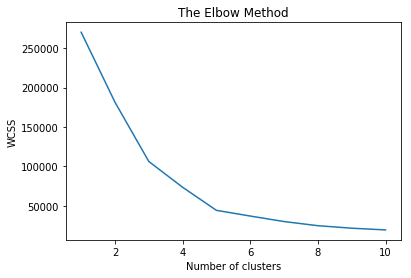

In [5]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import the data and assigning X value

df=pd.read_csv('C:\\Users\\Lenovo\\ML\\K_Mean\\K_Means-20190519T173739Z-001\\K_Means\\Mall_Customers.csv')
df.head()
X=df.iloc[:,[3,4]].values

# finding value for number of clusters
from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Kmeans
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [2]:
# adding column in df(datafram) specifying cluster labels for record
df['labels'] = kmeans.labels_
df.labels.unique()

# determing the label to which the Annualincome 34 belongs to
df['Annual Income (k$)'].groupby(df.labels).describe()
#value 34 falls in label 2,3 as 34 falls in min and max of label 2 and label 3

#divding the df data with respecte to labels
data1=df.groupby(df.labels)

X0=data1.get_group(0).iloc[:,[3]].values
X1=data1.get_group(1).iloc[:,[3]].values
X2=data1.get_group(2).iloc[:,[3]].values
X3=data1.get_group(3).iloc[:,[3]].values
X4=data1.get_group(4).iloc[:,[3]].values
Y0=data1.get_group(0).iloc[:,[4]].values
Y1=data1.get_group(1).iloc[:,[4]].values
Y2=data1.get_group(2).iloc[:,[4]].values
Y3=data1.get_group(3).iloc[:,[4]].values
Y4=data1.get_group(4).iloc[:,[4]].values

#modeling for all the data
from sklearn.linear_model import LinearRegression
lm0 = LinearRegression()
lm1 = LinearRegression()
lm2 = LinearRegression()
lm3 = LinearRegression()
lm4 = LinearRegression()

lm0.fit(X0,Y0)
lm1.fit(X1,Y1)
lm2.fit(X2,Y2)
lm3.fit(X3,Y3)
lm4.fit(X4,Y4)

# spending score
print('spending core for anuual income 34 in label2/cluster2 is',lm2.predict([[34]]))
print('spending core for anuual income 34 in label2/cluster2 is',lm3.predict([[34]]))


spending core for anuual income 34 in label2/cluster2 is [[22.78582303]]
spending core for anuual income 34 in label2/cluster2 is [[78.06449418]]


Purity is a measure of the extent to which clusters contain a single class. Its calculation can be thought of as follows: For each cluster, count the number of data points from the most common class in said cluster. Now take the sum over all clusters and divide by the total number of data points. 


    
Note that this measure doesn't penalize having many clusters. So for example, a purity score of 1 is possible by putting each data point in its own cluster. Also purity doesn't work well for imbalanced data: if a size 1000 dataset consists of two classes, one class contains 999 points and the other has only 1 point. No matter how bad a clustering algorithm performs, it will always give a very high purity value.

In [4]:
import numpy as np
from sklearn import metrics

# function to calculate purity
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

# function to divide the data into differnt classes
def SC_div(x):
    if x>=75:
        return 4
    if  x>=50 and x < 75:
        return 3
    if x>=25 and x <50:
        return 2
    if x<25:
        return 1
SC_div(50)
    
# dividing the spending score columns into classes    
df['SC_Class']=df['Spending Score (1-100)'].apply(SC_div)

Y=df['SC_Class']

#model
kmeans1=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans1=kmeans1.fit_predict(X)

# calculating purity score
print('purity score s',purity_score(Y, y_kmeans1))

purity score s 0.615
